In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# get input data
df = pd.read_csv('/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results/ratings.csv')
df

,user,objects,rate,_,time
0,19,Soldier_r3_d500,7,0,2023-03-20-09:29:29+01:00
1,19,Soldier_r3_d250,5,0,2023-03-20-09:29:47+01:00
2,19,RedAndBlack_r3_d125,5,0,2023-03-20-09:30:01+01:00
3,19,Soldier_r5_d250,7,0,2023-03-20-09:30:16+01:00
4,19,Soldier_r5_d500,8,0,2023-03-20-09:30:30+01:00
...,...,...,...,...,...
499,33,Soldier_r3_d250,7,0,2023-03-21-14:28:39+01:00
500,33,RedAndBlack_r5_d125,7,0,2023-03-21-14:28:57+01:00
501,33,Soldier_r3_d500,8,0,2023-03-21-14:29:27+01:00
502,33,RedAndBlack_r3_d500,8,0,2023-03-21-14:29:39+01:00


In [3]:
objects_rates = {}
for i in range(len(df["objects"])):
    metadata = df["objects"][i].split("_")
    object = metadata[0]
    quality = metadata[1]
    distance = metadata[len(metadata)-1]
    if len(metadata) == 4:
        quality = "{}_{}".format(quality, metadata[2])
        
    if object in objects_rates:
        if quality in objects_rates[object]:
            if distance in objects_rates[object][quality]:
                objects_rates[object][quality][distance].append(df["rate"][i])
            else:
                objects_rates[object][quality][distance] = []
        else:
            objects_rates[object][quality] = {}
    else:
        objects_rates[object] = {}

# objects_rates


In [4]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['#D7191C', '#2C7BB6']
def drawBoxPlotV1(dataset, ouputPath, title, labels):
    fig = plt.figure(figsize=(9,6))
    
    plt.figure()

    for i in range (len(dataset)):
        bp = plt.boxplot(dataset[i], positions=np.array(range(len(dataset[i])))*2 + 0.2*len(dataset) - 0.7*i, sym='', widths=0.6)
        set_box_color(bp, colors[i]) # colors are from http://colorbrewer2.org/

        # draw temporary red and blue lines and use them to create a legend
        plt.plot([], c=colors[i], label=labels[i])

    plt.legend()

    plt.xticks(range(0, len(labels) * 2, 2), labels)
    plt.xlim(-2, len(labels)*2)
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(ouputPath, title))
    plt.show()

In [6]:
def drawBoxPlotV2(data_groups, ouputPath, title, x_labels, legends, x_title, y_title):
    width       = 1/len(x_labels)
    xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_groups[0])) ]

    # symbol      = 'r+'
    ymin        = 0 #min ( [ val  for dg in data_groups  for data in dg for val in data ] )
    ymax        = 10 # max ( [ val  for dg in data_groups  for data in dg for val in data ])

    ax = plt.gca()
    ax.set_ylim(ymin,ymax)

    ax.grid(True, linestyle='dotted')
    ax.set_axisbelow(True)

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    space = len(data_groups)/2
    # offset = len(data_groups)/2


    # --- Offset the positions per group:

    group_positions = []
    for num, dg in enumerate(data_groups):    
        _off = (0 - space + (0.5+num))
        # print(_off)
        group_positions.append([x+_off*(width+0.01) for x in xlocations])

    bp = []
    for dg, pos, c in zip(data_groups, group_positions, colors):
        bp.append(ax.boxplot(dg, 
                    # sym=symbol,
                    labels=['']*len(x_labels),
                #    labels=labels_list,
                    positions=pos, 
                    widths=width, 
                    boxprops=dict(facecolor=c),
        #             capprops=dict(color=c),
        #            whiskerprops=dict(color=c),
        #            flierprops=dict(color=c, markeredgecolor=c),                       
                    medianprops=dict(color='black'),
        #           notch=False,  
        #           vert=True, 
        #           whis=1.5,
        #           bootstrap=None, 
        #           usermedians=None, 
        #           conf_intervals=None,
                    patch_artist=True,
                    )
        )
    data_labels = [bp[i]["boxes"][0] for i in range(len(bp))]
    plt.legend(data_labels, legends)
    ax.set_xticks( xlocations )
    ax.set_xticklabels( x_labels, rotation=0 )

    plt.tight_layout()
    plt.savefig("{}/{}.pdf".format(ouputPath, title))
    plt.show()


In [7]:
# constants

# videos
soldier = "Soldier"
redBlack = "RedAndBlack"
loot = "Loot"
longDress = "LongDress"

# qualities
r1 = "r1"
r3 = "r3"
r5 = "r5"

r11 = "r1_r1"
r33 = "r3_r3"
r55 = "r5_r5"

r13 = "r1_r3"
r31 = "r3_r1"

r15 = "r1_r5"
r51 = "r5_r1"

r35 = "r3_r5"
r53 = "r5_r3"

# distances
d125 = "d125"
d250 = "d250"
d500 = "d500"

## QoMEX - Task 1

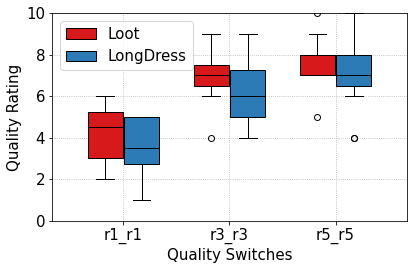

[[5, 6, 4, 5, 5, 3, 6, 2, 4, 3, 2, 6], [7, 7, 7, 8, 7, 9, 7, 6, 6, 4, 8], [8, 8, 8, 10, 8, 7, 8, 7, 7, 8, 5, 9]]
[[3, 5, 4, 3, 4, 3, 5, 5, 2, 1, 2, 5], [5, 6, 6, 9, 5, 8, 8, 6, 4, 5, 4, 7], [8, 7, 9, 7, 8, 7, 6, 7, 4, 4, 10]]


In [34]:
plt.rcParams.update({'font.size': 15})
q1=r11
q2=r33
q3=r55
title = "task1_constant"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500],
          objects_rates[video1][q3][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500],
          objects_rates[video2][q3][d500]]
x=[r11, r33, r55]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switches", "Quality Rating")
print(data_a)
print(data_b)

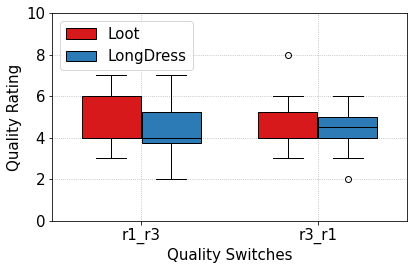

[[4, 6, 4, 7, 4, 6, 5, 3, 4, 4, 3, 6], [4, 6, 4, 6, 4, 4, 8, 4, 4, 5, 3, 4]]
[[2, 7, 4, 5, 4, 7, 6, 4, 4, 2, 3, 4], [5, 6, 4, 5, 5, 5, 6, 4, 2, 3, 4, 4]]


In [33]:
plt.rcParams.update({'font.size': 15})
q1=r13
q2=r31
title = "task1_switch_13"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[q1, q2]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switches", "Quality Rating")
print(data_a)
print(data_b)

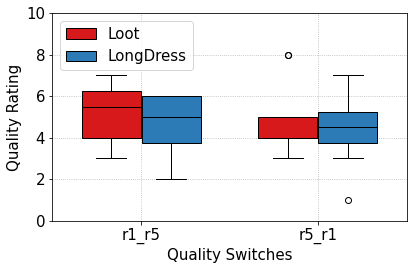

[[6, 7, 4, 6, 3, 7, 6, 5, 4, 3, 4, 7], [5, 8, 5, 4, 4, 4, 8, 4, 4, 4, 3, 5]]
[[4, 6, 6, 6, 5, 5, 5, 4, 3, 2, 3, 6], [4, 6, 5, 4, 3, 7, 6, 5, 5, 1, 3, 4]]


In [32]:
plt.rcParams.update({'font.size': 15})
q1=r15
q2=r51
title = "task1_switchUp_15"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[q1, q2]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switches", "Quality Rating")
print(data_a)
print(data_b)

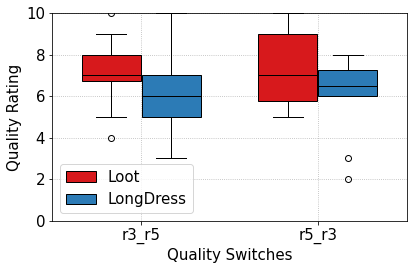

[[8, 7, 7, 10, 5, 7, 9, 7, 7, 6, 4, 8], [5, 8, 7, 10, 7, 6, 9, 7, 5, 9, 5, 9]]
[[5, 7, 6, 10, 7, 6, 6, 7, 5, 3, 5, 8], [6, 7, 6, 7, 8, 8, 7, 3, 6, 2, 6, 8]]


In [31]:
plt.rcParams.update({'font.size': 15})
q1=r35
q2=r53
title = "task1_switchUp_35"
video1 = loot
video2 = longDress

data_a = [objects_rates[video1][q1][d500],
          objects_rates[video1][q2][d500]]
data_b = [objects_rates[video2][q1][d500],
          objects_rates[video2][q2][d500]]
x=[q1, q2]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Quality Switches", "Quality Rating")
print(data_a)
print(data_b)

## QoMEX - Task 2

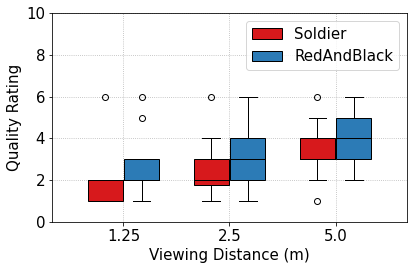

[[1, 1, 6, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1], [2, 6, 4, 1, 3, 1, 3, 1, 2, 2, 2, 3], [3, 3, 6, 3, 1, 4, 3, 4, 5, 4, 2, 3, 4]]
[[2, 1, 6, 2, 1, 2, 3, 2, 1, 2, 5, 3, 2], [4, 6, 3, 1, 3, 4, 3, 2, 2, 2, 3, 4], [4, 2, 6, 4, 3, 3, 5, 5, 3, 6, 5, 4, 6]]


In [30]:
plt.rcParams.update({'font.size': 15})
q=r1
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)

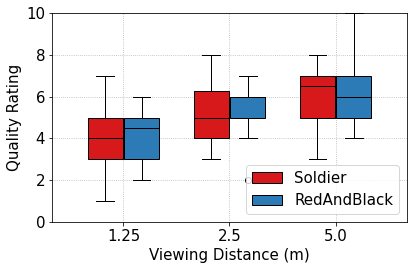

[[3, 5, 7, 3, 1, 4, 5, 3, 2, 5, 3, 5, 4], [6, 8, 5, 4, 5, 7, 6, 3, 5, 4, 4, 7], [5, 7, 5, 7, 6, 8, 5, 3, 7, 7, 6, 8]]
[[4, 6, 3, 2, 5, 5, 5, 2, 4, 5, 3, 5], [6, 5, 7, 5, 6, 4, 6, 6, 2, 7, 7, 4, 5], [5, 7, 5, 10, 5, 7, 7, 4, 5, 7, 5, 8]]


In [29]:
plt.rcParams.update({'font.size': 15})
q=r3
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)

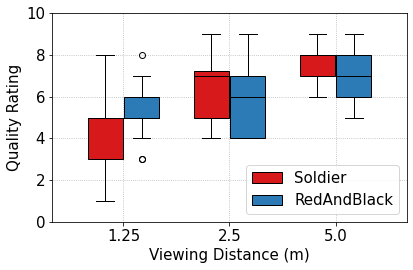

[[1, 5, 8, 3, 4, 6, 5, 5, 3, 3, 5, 4, 5], [7, 8, 5, 8, 6, 7, 7, 4, 4, 9, 5, 7], [7, 8, 8, 6, 8, 7, 9, 8, 7, 6, 9, 7, 9]]
[[5, 6, 8, 5, 7, 6, 4, 5, 3, 3, 5, 5, 7], [8, 6, 7, 6, 9, 4, 6, 5, 4, 4, 4, 6, 9], [8, 7, 7, 9, 7, 8, 6, 6, 5, 6, 5, 8]]


In [28]:
plt.rcParams.update({'font.size': 15})
q=r5
title = "task2_{}".format(q)
video1 = soldier
video2 = redBlack

data_a = [objects_rates[video1][q][d125],
          objects_rates[video1][q][d250],
          objects_rates[video1][q][d500]]
data_b = [objects_rates[video2][q][d125],
          objects_rates[video2][q][d250],
          objects_rates[video2][q][d500]]
x=["1.25", "2.5", "5.0"]
outputPath = "/Users/minhkstn/ownCloud/Documents/0_Spirit/3_proposals/1_subjective_test_hololens/results"
drawBoxPlotV2([data_a, data_b], outputPath, title, x, [video1, video2], "Viewing Distance (m)", "Quality Rating")
print(data_a)
print(data_b)